In [0]:
import jax
import jax.numpy as np
import numpy as onp
from jax.api import jit, grad

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_moons
onp.random.seed(42)

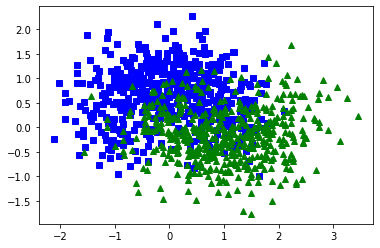

In [0]:
X, y = make_moons(1000, noise = 0.5)

axes = [-1.5, 2.5, -1, 1.5]
def plot_data(X, y, axes):
  plt.plot(X[:,0][y==0], X[:,1][y==0], "bs")
  plt.plot(X[:,0][y==1], X[:,1][y==1], "g^")

plot_data(X, y, axes)

In [0]:
X.shape

(1000, 2)

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(x))

def init_params():
  onp.random.seed(2)
  return [onp.random.randn(2, 4), #w1
  onp.zeros(4), #b1
  onp.random.randn(4, 1),#w2
  onp.random.randn(1)]

def predict(X, params):
  W1 = params[0]
  b1 = params[1]
  W2 = params[2]
  b2 = params[3]
  Z1 = np.dot(X, W1) + b1
  A1 = sigmoid(Z1)
  Z2 = np.dot(A1, W2) + b2
  A2 = sigmoid(Z2)

  return A2

def loss(params, X, y):
  A2 = predict(X, params)
  m = 1000*1000
  loss = -(1/m)*np.sum(y*np.log(A2) + (1-y)*np.log(1-A2))
  return loss

In [0]:
X1 = np.asarray(X)
lr = 0.01
num_epochs = 5000
loss_grads = jax.jit(jax.grad(loss))
params = init_params()
costs = []
for i in range(num_epochs):
  #print("epoch-> " + str(i+1))
  A2 = predict(X, params)
  cost = loss(params, X, y)
  costs.append(cost)
  #print("cost ->" + str(cost))
  grads = (loss_grads(params, X, y))
  params = [param - lr*grad for param, grad in zip(params, grads)]
  if i%500 == 0:
    print("epoch ->" + str(i))
    print("cost ->" + str(cost))

epoch ->0
cost ->0.73080736
epoch ->500
cost ->0.7121929
epoch ->1000
cost ->0.7046052
epoch ->1500
cost ->0.7007019
epoch ->2000
cost ->0.6985697
epoch ->2500
cost ->0.6973104
epoch ->3000
cost ->0.6965039
epoch ->3500
cost ->0.69594675
epoch ->4000
cost ->0.6955439
epoch ->4500
cost ->0.6952377


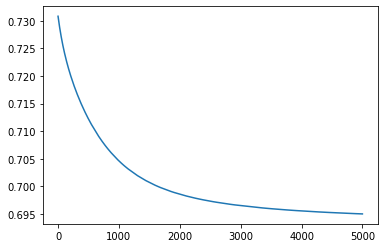

In [0]:
plt.plot(costs)

In [0]:
#stochastic gd with learning rate decay
params = init_params()
costs_2 = []
lrl = 0.01
lrT = 0.01*lrl
T = 3500
num_epochs = 5000
for i in range(num_epochs):
  A2 = predict(X, params)
  cost = loss(params, X, y)
  costs_2.append(cost)
  #print("cost ->" + str(cost))
  if lrl>lrT:
    lrl = lrl*(1-i/T) + lrT
  else:
    lrl = lrT
  grads = (loss_grads(params, X, y))
  params = [param - lrl*grad for param, grad in zip(params, grads)]
  if i%500 == 0:
    print("epoch ->" + str(i))
    print("cost ->" + str(cost))

epoch ->0
cost ->0.7308064
epoch ->500
cost ->0.7213865
epoch ->1000
cost ->0.72047585
epoch ->1500
cost ->0.7199732
epoch ->2000
cost ->0.71962583
epoch ->2500
cost ->0.71936333
epoch ->3000
cost ->0.7191511
epoch ->3500
cost ->0.71897525
epoch ->4000
cost ->0.718812
epoch ->4500
cost ->0.71865344


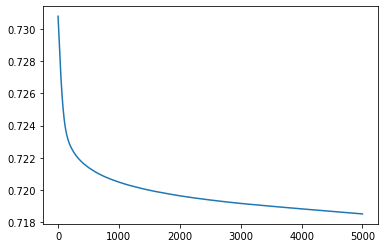

In [0]:
plt.plot(costs_2)

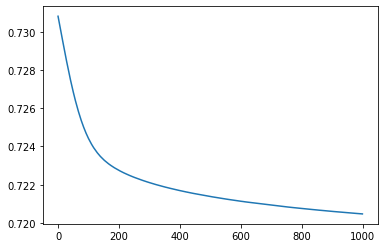

In [0]:
#sgd with weight updates starts converging before the 1000th epoch
plt.plot(costs_2[0:1000]) 

In [0]:
#momentum
def init_vel():
  return [onp.zeros((2, 4)),
          onp.zeros((4)),
          onp.zeros((4,1)),
          onp.zeros((1))]

vel = init_vel()
alpha = 0.9
params = init_params()
num_epochs = 5000
lr = 0.01
costs_3 = []
for i in range(num_epochs):
  A2 = predict(X, params)
  cost = loss(params, X, y)
  costs_3.append(cost)
  #print("cost ->" + str(cost))
  grads = (loss_grads(params, X, y))
  vel = [alpha*v - lr*grad for v, grad in zip(vel, grads)]
  params = [param + v for v, param in zip(vel, params)]
  if i%500 == 0:
    print("epoch ->" + str(i))
    print("cost ->" + str(cost))

epoch ->0
cost ->0.73080677
epoch ->500
cost ->0.6949923
epoch ->1000
cost ->0.6941223
epoch ->1500
cost ->0.69392157
epoch ->2000
cost ->0.69380355
epoch ->2500
cost ->0.6937118
epoch ->3000
cost ->0.6936388
epoch ->3500
cost ->0.69357693
epoch ->4000
cost ->0.69352573
epoch ->4500
cost ->0.693483


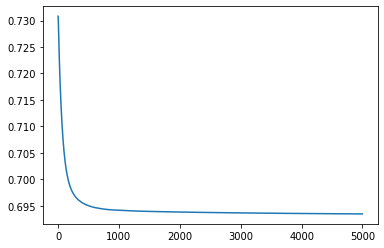

In [0]:
plt.plot(costs_3)

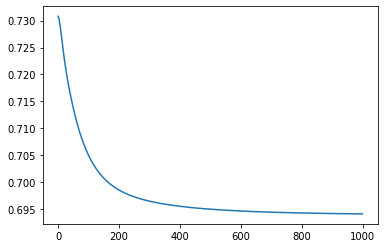

In [0]:
#this also starts converging before the 1000th epoch
plt.plot(costs_3[0:1000])

In [0]:
#nestero momentum
vel = init_vel()
params = init_params()
params1 = init_params() #not required to init the same way
alpha = 0.9
lr = 0.01
num_epochs = 5000
costs_4 = []
for i in range(num_epochs):
  A2 = predict(X, params)
  cost = loss(params, X, y)
  costs_4.append(cost)
  param1 = [param + alpha*v for param, v in zip(params, vel)]
  grads = loss_grads(param1, X, y)
  vel = [alpha*v - lr*grad for v, grad in zip(vel, grads)]
  params = [param + v for param, v in zip(params, vel)]
  if i%500 ==0:
    print("epoch ->" + str(i))
    print("cost ->" + str(cost))

epoch ->0
cost ->0.73080724
epoch ->500
cost ->0.6949979
epoch ->1000
cost ->0.6941221
epoch ->1500
cost ->0.6939217
epoch ->2000
cost ->0.69380367
epoch ->2500
cost ->0.69371253
epoch ->3000
cost ->0.69363886
epoch ->3500
cost ->0.69357705
epoch ->4000
cost ->0.69352627
epoch ->4500
cost ->0.6934829


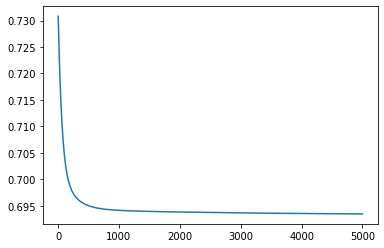

In [0]:
plt.plot(costs_4)

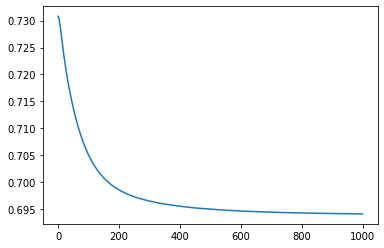

In [0]:
#starts converging before the 1000th epoch as well
plt.plot(costs_4[0:1000])

In [0]:
#adagrad
def init_r():
  return [np.zeros((2,4)),
          np.zeros((4)),
          np.zeros((4,1)),
          np.zeros((1))]

r = init_r()
delta_params = init_r() #same fn can be used
costs_5 = []
delta = 1e-7
params = init_params()
num_epochs = 5000
lr = 0.01
for i in range(num_epochs):
  A2 = predict(X, params)
  cost = loss(params, X, y)
  costs_5.append(cost)
  grads = loss_grads(params, X, y)
  r = [r1 + grad*grad for r1, grad in zip(r, grads)]
  delta_params = [-(lr/(delta+np.sqrt(r1)))*grad for r1, grad in zip(r, grads)]
  params = [param + delta_param for param, delta_param in zip(params, delta_params)]
  if i%500==0:
    print("epoch ->" + str(i))
    print("cost ->" + str(cost))

epoch ->0
cost ->0.7308077
epoch ->500
cost ->0.6953798
epoch ->1000
cost ->0.6941752
epoch ->1500
cost ->0.6938345
epoch ->2000
cost ->0.69364655
epoch ->2500
cost ->0.69352406
epoch ->3000
cost ->0.69343996
epoch ->3500
cost ->0.6933802
epoch ->4000
cost ->0.6933365
epoch ->4500
cost ->0.69330364


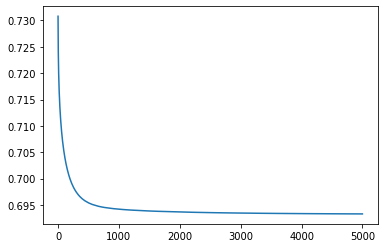

In [0]:
plt.plot(costs_5)

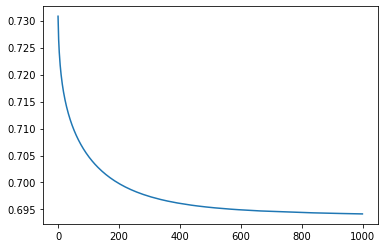

In [0]:
#starts converging before the 1000th epoch as well
plt.plot(costs_5[0:1000])

In [0]:
#rmsprop
r = init_r()
vel = init_vel()
lr = 0.01
rho = 0.1
alpha = 0.9
costs_6 = []
delta = 1e-7
params = init_params()
params1 = init_params()
num_epochs = 5000
for i in range(num_epochs):
  A2 = predict(X, params)
  cost = loss(params, X, y)
  costs_6.append(cost)
  params1 = [param + alpha*v for param, v in zip(params, vel)]
  grads = loss_grads(params1, X, y)
  r = [r1*rho + (1-rho)*grad*grad for r1, grad in zip(r, grads)]
  vel = [alpha*v - grad*lr/(delta + np.sqrt(r1)) for v, r1, grad in zip(vel, r, grads)]
  params = [param + v for param, v in zip(params, vel)]
  if i%500==0:
    print("epoch ->" + str(i))
    print("cost ->" + str(cost))

epoch ->0
cost ->0.730807
epoch ->500
cost ->0.6931673
epoch ->1000
cost ->0.69316393
epoch ->1500
cost ->0.69316256
epoch ->2000
cost ->0.6931605
epoch ->2500
cost ->0.69315857
epoch ->3000
cost ->0.6931565
epoch ->3500
cost ->0.69315624
epoch ->4000
cost ->0.69315535
epoch ->4500
cost ->0.69315463


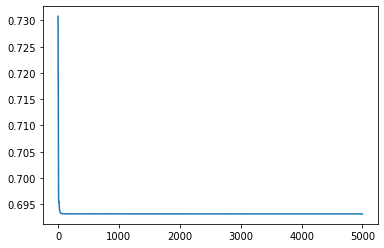

In [0]:
plt.plot(costs_6)

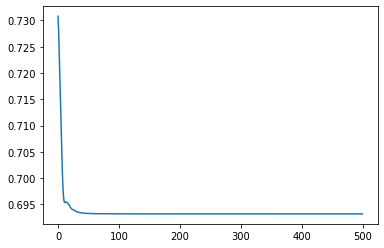

In [0]:
#this looks really steep
#lets plot out epochs 0-500 to check where it starts converging
plt.plot(costs_6[0:500])

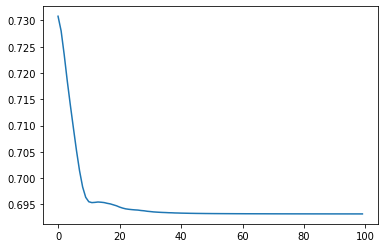

In [0]:
#still no, plotting out 0-100 epochs
plt.plot(costs_6[0:100])